In [0]:
from google.colab import drive
drive.mount('/content/drive/')

directory = '/content/drive/My Drive/'
import os
# os.listdir(directory)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import pandas as pd
pd.options.display.max_columns = None

# train = pd.read_csv(directory+'train.tar.gz', compression='gzip', header=0, sep=';', quotechar='"')
train = pd.read_csv(directory+'train.tar.gz', compression='gzip', header=0, sep=';', quotechar='"', nrows = 500000)

# test = pd.read_csv(directory+'test-data.tar.gz', compression='gzip', header=0, sep=';', quotechar='"')
# test = pd.read_csv(directory+'2test-data.tar.gz', compression='gzip', header=0, sep=',', quotechar='"')

# test = pd.read_csv(directory+'test-data.tar.gz', compression='gzip', header=0, sep=';', quotechar='"', nrows=55)
test = pd.read_csv(directory+'2test-data.tar.gz', compression='gzip', header=0, sep=',', quotechar='"', nrows=55500)

print (len(test))

55500


In [0]:
test = test[['test.csv', 'label', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'CG1', 'CG2', 'CG3', 'l1', 'l2', 'C11', 'C12']]
test.head()

,test.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
0,1379538000,-1,4210358866,3196051971,3336,2094,22,995,0,361,15,566,"176,213,220,222,224,47,422,103,419,74,3,235,23...",NaN,NaN,0,0,0,103
1,1379538000,-1,2248128334,3994996972,393,16232,52,995,2,8,15,821,"379,384,98,96,215,224,186,188,183,184,49,50,47...","17179,3883,20334,20333,25423,5318,10989,8668,2...",NaN,6,0,0,104
2,1379538000,-1,2323433900,1100964395,4454,34157,11,995,2,361,15,672,"243,380,269,420,363,31,18,214,331,60,58,306,19...",NaN,NaN,48,0,0,106
3,1379538000,-1,3430094722,1690426382,5919,6384,25,2658,0,390,22,722,"448,277,276,275,99,154,155,76,412,139,333,332,...","22337,2002","43074,43841,45509,45500,33701,54846,38344,1159...",2,0,1,106
4,1379538000,-1,3531271529,3678868632,1169,26182,30,995,0,94,15,1131,"273,170,205,204,174,173,248,384,382,381,92,97,...",16129,NaN,23,0,0,104


In [0]:
train.head()

,train.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
0,1379278800,0,2733540231,3500392421,4454,15573,11,995,2,176,15,671,"384,382,96,88,185,49,385,268,448,438,279,420,1...",NaN,NaN,32,0,0,106
1,1379278800,0,1964843810,1232327635,2081,2547,11,995,2,361,15,802,"96,49,385,268,107,438,418,124,357,17,435,130,3...",NaN,NaN,1,0,0,106
2,1379278800,0,660357674,2066571765,602,29581,29,995,0,468,15,758,"170,169,205,204,176,252,243,382,98,220,222,181...",NaN,NaN,119,0,0,103
3,1379278800,0,2962648192,2373358995,4018,36969,30,995,2,8,15,67,"273,205,383,382,381,219,216,215,225,49,47,54,3...","28071,6916,9108",NaN,0,0,0,106
4,1379278800,0,1822613420,446973819,2081,23457,35,995,0,452,15,821,"268,419,357,18,331,59,57,99,154,155,76,412,122...",NaN,NaN,5,0,0,106


In [0]:
# len(train) = 29989753

# train.csv 259201
# label 3
# C1 968188
# C2 88651
# C3 5931
# C4 32205
# C5 99
# C6 3806
# C7 4
# C8 452
# C9 102
# C10 1325
# CG1 2096666
# CG2 148996
# CG3 239353
# l1 20444
# l2 87
# C11 3
# C12 9

# CG1 <class 'str'>
# CG2 <class 'float'>
# CG3 <class 'float'>

cols = ['train.csv', 'label', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'CG1', 'CG2', 'CG3', 'l1', 'l2', 'C11', 'C12']
cat_cols = ['C5', 'C7', 'C9', 'l2', 'C11', 'C12']
cg_cols = ['CG1', 'CG2', 'CG3']

import numpy as np

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max and c_prec == np.finfo(np.float16).precision:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float64).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
  
# test = reduce_mem_usage(test)
# train = reduce_mem_usage(train)

In [0]:
train.head()

,train.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
0,1379278800,0,2733540231,3500392421,4454,15573,11,995,2,176,15,671,"384,382,96,88,185,49,385,268,448,438,279,420,1...",NaN,NaN,32,0,0,106
1,1379278800,0,1964843810,1232327635,2081,2547,11,995,2,361,15,802,"96,49,385,268,107,438,418,124,357,17,435,130,3...",NaN,NaN,1,0,0,106
2,1379278800,0,660357674,2066571765,602,29581,29,995,0,468,15,758,"170,169,205,204,176,252,243,382,98,220,222,181...",NaN,NaN,119,0,0,103
3,1379278800,0,2962648192,2373358995,4018,36969,30,995,2,8,15,67,"273,205,383,382,381,219,216,215,225,49,47,54,3...","28071,6916,9108",NaN,0,0,0,106
4,1379278800,0,1822613420,446973819,2081,23457,35,995,0,452,15,821,"268,419,357,18,331,59,57,99,154,155,76,412,122...",NaN,NaN,5,0,0,106


In [0]:
def make_feature(data, key):
#   dfmean = data.groupby(key)[['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'l1']].mean().reset_index()
#   dfmin = data.groupby(key)[['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'l1']].min().reset_index()
#   dfmax = data.groupby(key)[['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'l1']].max().reset_index()
#   dfstd = data.groupby(key)[['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'l1']].std().reset_index()
  
  sss = data.groupby(key)[['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'l1']].mean().reset_index()
  data =  pd.merge(data, sss, how = 'left',
                  left_on  = [key],
                  right_on = [key], suffixes=("","_mean"))
  sss = data.groupby(key)[['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'l1']].min().reset_index()
  data =  pd.merge(data, sss, how = 'left',
                  left_on  = [key],
                  right_on = [key], suffixes=("","_min"))
  sss = data.groupby(key)[['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'l1']].max().reset_index()
  data =  pd.merge(data, sss, how = 'left',
                  left_on  = [key],
                  right_on = [key], suffixes=("","_max"))
  sss = data.groupby(key)[['C1', 'C2', 'C3', 'C4', 'C6', 'C8', 'C10', 'l1']].std().reset_index()
  data =  pd.merge(data, sss, how = 'left',
                  left_on  = [key],
                  right_on = [key], suffixes=("","_std"))
  return data

# train = make_feature(train, 'train.csv')
# test = make_feature(test, 'test.csv')

train['isTrain'] = True
train['id'] = train.index
test['id'] = test.index
test['isTrain'] = False
data = train.append(test, ignore_index=True)
data.head()

import gc
del train
del test
gc.collect()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


21

In [0]:
data.head()

,C1,C10,C11,C12,C2,C3,C4,C5,C6,C7,C8,C9,CG1,CG2,CG3,id,isTrain,l1,l2,label,test.csv,train.csv
0,2733540231,671,0,106,3500392421,4454,15573,11,995,2,176,15,"384,382,96,88,185,49,385,268,448,438,279,420,1...",NaN,NaN,0,True,32,0,0,NaN,1.379279e+09
1,1964843810,802,0,106,1232327635,2081,2547,11,995,2,361,15,"96,49,385,268,107,438,418,124,357,17,435,130,3...",NaN,NaN,1,True,1,0,0,NaN,1.379279e+09
2,660357674,758,0,103,2066571765,602,29581,29,995,0,468,15,"170,169,205,204,176,252,243,382,98,220,222,181...",NaN,NaN,2,True,119,0,0,NaN,1.379279e+09
3,2962648192,67,0,106,2373358995,4018,36969,30,995,2,8,15,"273,205,383,382,381,219,216,215,225,49,47,54,3...","28071,6916,9108",NaN,3,True,0,0,0,NaN,1.379279e+09
4,1822613420,821,0,106,446973819,2081,23457,35,995,0,452,15,"268,419,357,18,331,59,57,99,154,155,76,412,122...",NaN,NaN,4,True,5,0,0,NaN,1.379279e+09


In [0]:
data = data.fillna(-1)
# type(data['CG1'][0])
# data['CG1norm']=data['CG1'].apply(lambda x : len(str(x).split(',') if str(x)!='NaN' else 0))
# data['CG2norm']=data['CG2'].apply(lambda x : len(str(x).split(',') if str(x)!='NaN' else 0))
# data['CG3norm']=data['CG3'].apply(lambda x : len(str(x).split(',') if str(x)!='NaN' else 0))

# data['CG1mean']=data['CG1'].apply(lambda x : np.array([int(el) for el in str(x).split(',')]).mean() if str(x)!='NaN' else 0)
# data['CG2mean']=data['CG2'].apply(lambda x : np.array([int(el) for el in str(x).split(',')]).mean() if str(x)!='NaN' else 0)
# data['CG3mean']=data['CG3'].apply(lambda x : np.array([int(el) for el in str(x).split(',')]).mean() if str(x)!='NaN' else 0)
data.head()

,C1,C10,C11,C12,C2,C3,C4,C5,C6,C7,C8,C9,CG1,CG2,CG3,id,isTrain,l1,l2,label,test.csv,train.csv
0,2733540231,671,0,106,3500392421,4454,15573,11,995,2,176,15,"384,382,96,88,185,49,385,268,448,438,279,420,1...",-1,-1,0,True,32,0,0,-1.0,1.379279e+09
1,1964843810,802,0,106,1232327635,2081,2547,11,995,2,361,15,"96,49,385,268,107,438,418,124,357,17,435,130,3...",-1,-1,1,True,1,0,0,-1.0,1.379279e+09
2,660357674,758,0,103,2066571765,602,29581,29,995,0,468,15,"170,169,205,204,176,252,243,382,98,220,222,181...",-1,-1,2,True,119,0,0,-1.0,1.379279e+09
3,2962648192,67,0,106,2373358995,4018,36969,30,995,2,8,15,"273,205,383,382,381,219,216,215,225,49,47,54,3...","28071,6916,9108",-1,3,True,0,0,0,-1.0,1.379279e+09
4,1822613420,821,0,106,446973819,2081,23457,35,995,0,452,15,"268,419,357,18,331,59,57,99,154,155,76,412,122...",-1,-1,4,True,5,0,0,-1.0,1.379279e+09


In [0]:
# data = data.fillna(-1)
# data.head()

train = data[data.isTrain][[el for el in data.columns if el not in ['CG1', 'CG2', 'CG3', 'id', 'label', 'isTrain', 'test.csv', 'train.csv']]]
test = data[data.isTrain==False][[el for el in data.columns if el not in ['CG1', 'CG2', 'CG3', 'id', 'label', 'isTrain', 'test.csv', 'train.csv']]]
y = data[data.isTrain][['label']]

print (len(test))

del data
gc.collect()

55500


0

In [0]:
test.head()

,C1,C10,C11,C12,C2,C3,C4,C5,C6,C7,C8,C9,l1,l2
500000,4210358866,566,0,103,3196051971,3336,2094,22,995,0,361,15,0,0
500001,2248128334,821,0,104,3994996972,393,16232,52,995,2,8,15,6,0
500002,2323433900,672,0,106,1100964395,4454,34157,11,995,2,361,15,48,0
500003,3430094722,722,1,106,1690426382,5919,6384,25,2658,0,390,22,2,0
500004,3531271529,1131,0,104,3678868632,1169,26182,30,995,0,94,15,23,0


In [0]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import TimeSeriesSplit, KFold
# import lightgbm as lgb
# from sklearn.metrics import log_loss
# # import numpy as np

# X_train, X_valid, Y_train, Y_valid = train_test_split(train,  y, random_state=7, test_size=0.3) # на 0.3 0.0176007, на 0.05 почти тоже самое
# Xcv = X_train
# Ycv = Y_train

# gbmcv = lgb.LGBMRegressor(objective = 'regression',  # 0.014858109826692069
#                             max_depth = 9,
#                             colsample_bytre = 0.8,
#                             subsample = 0.8,
#                             learning_rate = 0.1,
#                             n_estimators = 300, random_state = 1)

# n_fold = 5 # 0.0176007 при 5 фолдах, на 10 чуть хуже
# folds = KFold(n_splits=n_fold, shuffle=False, random_state=1)

# prediction_val = np.zeros(X_valid.shape[0])

# for fold_n, (train_index, test_index) in enumerate(folds.split(Xcv)):
#     print('Fold:', fold_n)
#     X_traincv, X_validcv = Xcv.iloc[train_index], Xcv.iloc[test_index]
#     Y_traincv, Y_validcv = Ycv.iloc[train_index], Ycv.iloc[test_index]

#     gbmcv.fit(X_traincv, Y_traincv, eval_set=[(X_validcv, Y_validcv)], eval_metric='rmse', early_stopping_rounds=5)
    
#     y_pred = gbmcv.predict(X_valid)
#     prediction_val += y_pred
# prediction_val /= n_fold

# # Y_valid = [1,0,0]
# log_loss(Y_valid, prediction_val)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit, KFold
import lightgbm as lgbm
from sklearn.metrics import log_loss
# import numpy as np

X_train, X_valid, Y_train, Y_valid = train_test_split(train,  y, random_state=7, test_size=0.3) 
Xcv = X_train
Ycv = Y_train

# parameters for LightGBMClassifier  0.01457342686984739
params = {
    'objective' :'binary',
    'learning_rate' : 0.02,
    'num_leaves' : 76,
    'feature_fraction': 0.64, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss'
}


n_fold = 5 
folds = KFold(n_splits=n_fold, shuffle=False, random_state=1)

prediction_val = np.zeros(X_valid.shape[0])
predictions = np.zeros(test.shape[0])

prediction_val_1 = np.zeros(X_valid.shape[0])
prediction_val_2 = np.zeros(X_valid.shape[0])
prediction_val_3 = np.zeros(X_valid.shape[0])
prediction_val_4 = np.zeros(X_valid.shape[0])
prediction_val_5 = np.zeros(X_valid.shape[0])
predictions_1 = np.zeros(test.shape[0])
predictions_2 = np.zeros(test.shape[0])
predictions_3 = np.zeros(test.shape[0])
predictions_4 = np.zeros(test.shape[0])
predictions_5 = np.zeros(test.shape[0])

for fold_n, (train_index, test_index) in enumerate(folds.split(Xcv)):
    print('Fold:', fold_n)
    X_traincv, X_validcv = Xcv.iloc[train_index], Xcv.iloc[test_index]
    Y_traincv, Y_validcv = Ycv.iloc[train_index], Ycv.iloc[test_index]
    
    d_train = lgbm.Dataset(X_traincv, Y_traincv)
    d_valid = lgbm.Dataset(X_validcv, Y_validcv)

    gbmcv = lgbm.train(params, d_train, 5000, valid_sets=[d_valid], verbose_eval=50, early_stopping_rounds=100)
    
    y_pred = gbmcv.predict(X_valid)
    prediction_val += y_pred
    
    y_pred_test = gbmcv.predict(test)
    predictions += y_pred_test

    if fold_n==0:
      prediction_val_1 = gbmcv.predict(X_valid)
      predictions_1 = gbmcv.predict(test)
    if fold_n==1:
      prediction_val_2 = gbmcv.predict(X_valid)
      predictions_2 = gbmcv.predict(test)
    if fold_n==2:
      prediction_val_3 = gbmcv.predict(X_valid)
      predictions_3 = gbmcv.predict(test)
    if fold_n==3:
      prediction_val_4 = gbmcv.predict(X_valid)
      predictions_4 = gbmcv.predict(test)
    if fold_n==4:
      prediction_val_5 = gbmcv.predict(X_valid)
      predictions_5 = gbmcv.predict(test)



prediction_val /= n_fold
predictions /= n_fold

log_loss(Y_valid, prediction_val)
# на проверке валидационного сета есть CV, а на предикте нет

Fold: 0
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.01404
[100]	valid_0's binary_logloss: 0.0138586
[150]	valid_0's binary_logloss: 0.0139149
[200]	valid_0's binary_logloss: 0.0140453
Early stopping, best iteration is:
[102]	valid_0's binary_logloss: 0.0138564
Fold: 1
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.0147318
[100]	valid_0's binary_logloss: 0.0145496
[150]	valid_0's binary_logloss: 0.0145541
[200]	valid_0's binary_logloss: 0.014652
Early stopping, best iteration is:
[132]	valid_0's binary_logloss: 0.0145308
Fold: 2
Training until validation scores don't improve for 100 rounds.
[50]	valid_0's binary_logloss: 0.0148489
[100]	valid_0's binary_logloss: 0.0147143
[150]	valid_0's binary_logloss: 0.0147181
[200]	valid_0's binary_logloss: 0.0148297
Early stopping, best iteration is:
[138]	valid_0's binary_logloss: 0.0147078
Fold: 3
Training until validation scores don't improve for

0.01633077663012254

In [0]:
log_loss(Y_valid, prediction_val_1),log_loss(Y_valid, prediction_val_2),log_loss(Y_valid, prediction_val_3),log_loss(Y_valid, prediction_val_4),log_loss(Y_valid, prediction_val_5)

(0.01651500168327783,
 0.016526818995652098,
 0.01665718782119621,
 0.01665715683823363,
 0.016467431007674106)

In [0]:
log_loss(Y_valid, prediction_val_3)

0.01665718782119621

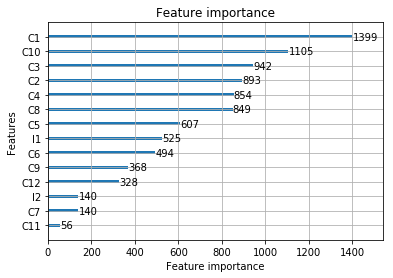

In [0]:
%matplotlib inline
lgbm.plot_importance(gbmcv, max_num_features=20)

In [0]:

subm = pd.read_csv(directory+'sample_submission.csv')
# subm = pd.read_csv(directory+'sample_submission.csv', nrows=10000)
print (len(subm))
print (subm.tail())

# submit = pd.DataFrame(gbmcv.predict(test), index=subm.index,columns=['label'])
# submit = pd.DataFrame(gbmcv.predict(test)[0:1317220]) # 0.0176007

# submit = pd.DataFrame(gbmcv.predict(test)) 

submit = pd.DataFrame(predictions) 

# submit = pd.DataFrame(gbmcv.predict(test)[1:1317221])  # 0.0275111
# submit = pd.DataFrame(gbmcv.predict(test)[2:1317222]) # неверно


submit.to_csv('submit_gbm_cl_cv_dopf.csv',header=None,index=False) # 0.0172866 пока лучший на классификаторе
submit.tail()

1317219
         0
1317214  1
1317215  0
1317216  0
1317217  1
1317218  1


,0
55495,0.000625
55496,0.001004
55497,0.000733
55498,0.000637
55499,0.000758


In [0]:
submit_1 = pd.DataFrame(predictions_1)
submit_1.to_csv('submit_gbm_1.csv',header=None,index=False)
submit_2 = pd.DataFrame(predictions_2)
submit_2.to_csv('submit_gbm_2.csv',header=None,index=False)
submit_3 = pd.DataFrame(predictions_3)
submit_3.to_csv('submit_gbm_3.csv',header=None,index=False)
submit_4 = pd.DataFrame(predictions_4)
submit_4.to_csv('submit_gbm_4.csv',header=None,index=False)
submit_5 = pd.DataFrame(predictions_5)
submit_5.to_csv('submit_gbm_5.csv',header=None,index=False)

In [0]:
len(subm)==len(submit)

False